# Post-processing pFRC Electromagnetics

In [1]:
# import Python libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import sys
from matplotlib import animation


# import TFLink libraries
sys.path.append("/Users/mlavell/TriForce/tfnavi")
from HDF5Reader import *
import TFNavi as navi

## Load field data

In [2]:
# load field data
path = '/Users/mlavell/TriForce/tflink/data/pFRC_f.hdf5'
fdata = HDF5Reader(path)

Loading HDF5 Field files.


In [27]:
fn = 128 # frame numbers
saveFigs= True

xmin, xmax = ( 0, 0.5)
ymin, ymax = ( 0, 0.5)
zmin, zmax = ( 0, 1.0)
vol = (xmax-xmin)*(ymax-ymin)*(zmax-zmin)

nx = fdata.frames[0].dims[2]
ny = fdata.frames[0].dims[1]
nz = fdata.frames[0].dims[0]

print(nx,ny,nz)
[dx,dy,dz] = fdata.dxdydz

xx = np.linspace(xmin, xmax, nx) + fdata.origin[0]
yy = np.linspace(ymin, ymax, ny) + fdata.origin[1]
zz = np.linspace(zmin, zmax, nz) + fdata.origin[2]

Bx = fdata.frames[fn].Bx
By = fdata.frames[fn].By
Bz = fdata.frames[fn].Bz

# convert from Telsa to Gauss
Bx *= 1e4; By *= 1e4; Bz *= 1e4

Ex = fdata.frames[fn].Ex
Ey = fdata.frames[fn].Ey
Ez = fdata.frames[fn].Ez

Jx = fdata.frames[fn].Jx
Jy = fdata.frames[fn].Jy
Jz = fdata.frames[fn].Jz

nsteps= fdata.nFrames
time= fdata.frames[fn].time

# index to slice data at midplanes
ix = nx//2
iy = ny//2
iz = nz//2

51 51 101


In [4]:
# Hot desaturated colormap
# Ref: https://towardsdatascience.com/beautiful-custom-colormaps-with-matplotlib-5bab3d1f0e72

import matplotlib.colors as mcolors

def rgb_to_dec(value):
    """ value size 3, return list of size 3 """
    return [v/256 for v in value]

def get_continuous_cmap(rgb_file):
    
    rgb_data= np.loadtxt(rgb_file,skiprows=2)
    rgb_list= [rgb_to_dec(i) for i in rgb_data]
    
    float_list= list(np.linspace(0,1,len(rgb_list)))
    cdict= dict()
    for num,col in enumerate(['red','green','blue']):
        col_list= [[float_list[i], rgb_list[i][num], rgb_list[i][num]] for i in range(len(float_list))]
        cdict[col]= col_list

    cmp= mcolors.LinearSegmentedColormap('my_cmp', segmentdata=cdict, N=256)
    return cmp


cmp_fname='tfnavi/TFLink_Notebooks/hot_desaturated.gp'
cmp_hd= get_continuous_cmap(cmp_fname)

## Magnetic field

Magnetic fields in simulation midplanes at t=71.431ns


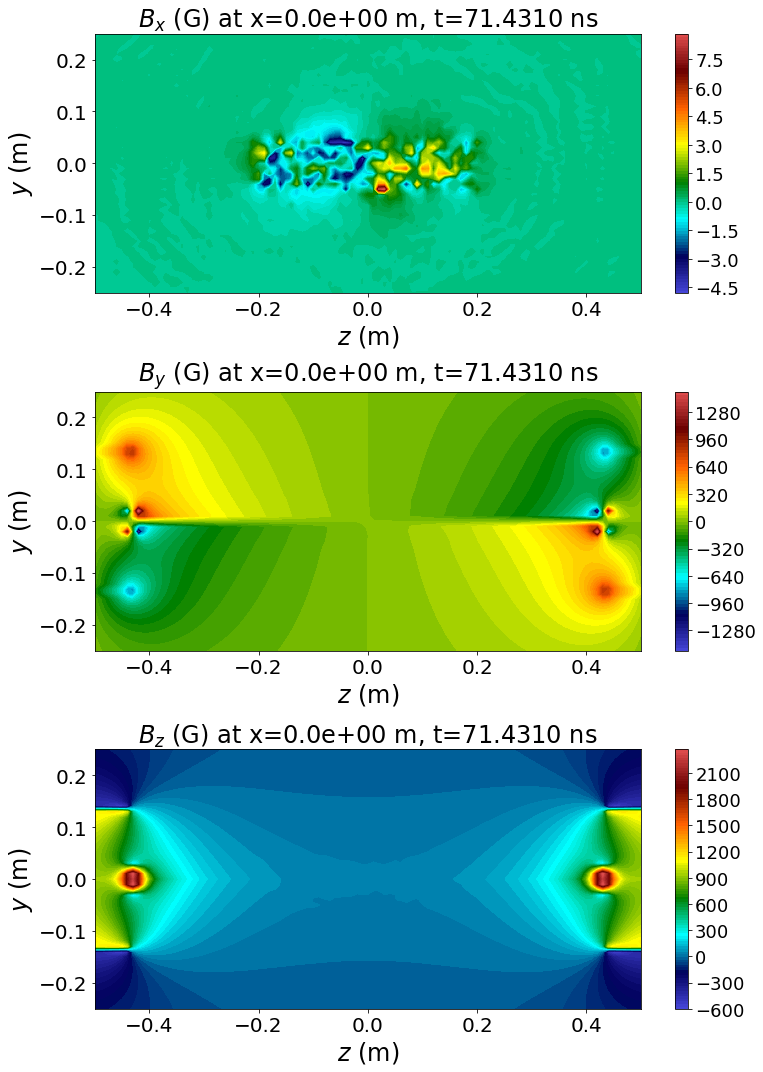

In [5]:
print(f"Magnetic fields in simulation midplanes at t={time*1e9:.3f}ns")

# Field in YZ plane ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
title=""#f"Magnetic field in zy midplane at t={time*1e9}ns"
figName="B_zy.png"

Z,Y= np.meshgrid(zz,yy,indexing="ij")

BxContourZY = navi.ContourPlot(xdata=Z,ydata=Y,zdata=Bx[:,:,ix],
                         ind=1,title=f"$B_x$ (G) at x={xx[ix]:.1e} m, t={time*1e9:.4f} ns",xlabel="$z$ (m)",ylabel="$y$ (m)",
                         cmap=cmp_hd)
ByContourZY = navi.ContourPlot(xdata=Z,ydata=Y,zdata=By[:,:,ix],
                         ind=1,title=f"$B_y$ (G) at x={xx[ix]:.1e} m, t={time*1e9:.4f} ns",xlabel="$z$ (m)",ylabel="$y$ (m)",
                         cmap=cmp_hd)
BzContourZY = navi.ContourPlot(xdata=Z,ydata=Y,zdata=Bz[:,:,ix],
                         ind=1,title=f"$B_z$ (G) at x={xx[ix]:.1e} m, t={time*1e9:.4f} ns",xlabel="$z$ (m)",ylabel="$y$ (m)",
                         cmap=cmp_hd)

navi.make_subplots(BxContourZY,ByContourZY,BzContourZY,nrows=3,ncols=1,fig_title=title,figsize=(11,15),save_fig=saveFigs,save_name=figName)


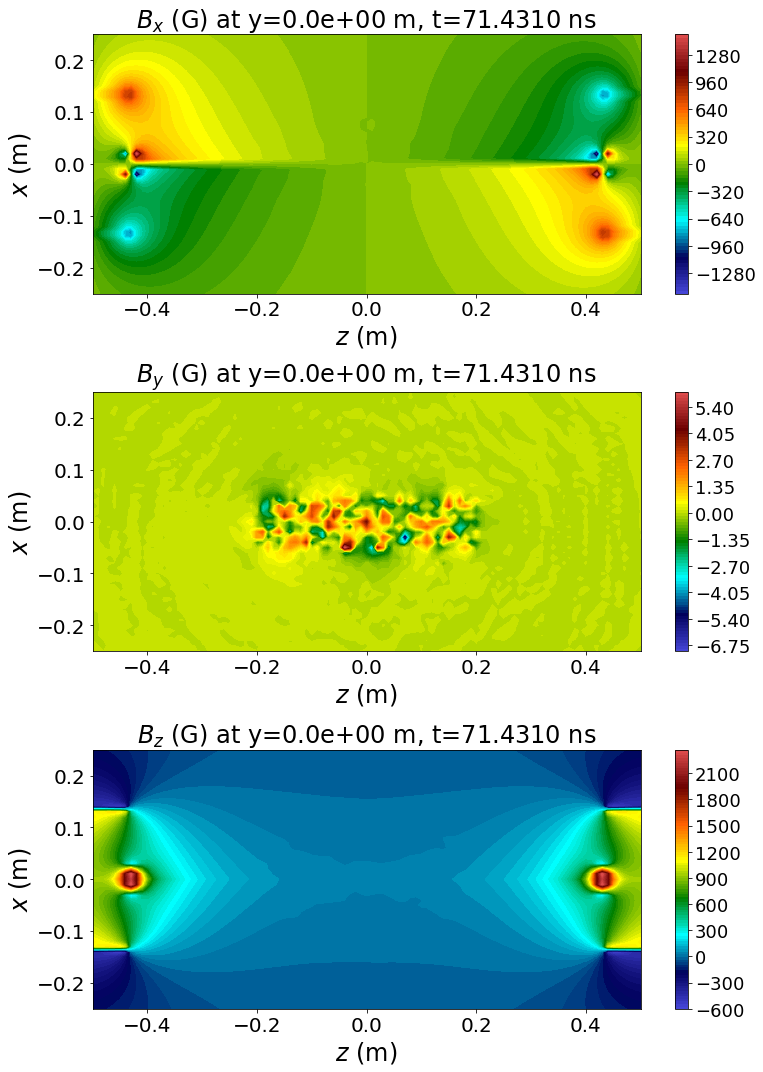

In [6]:
# Field in XZ plane ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
title=""#f"Magnetic field in zx midplane at t={time*1e9}ns"
figName="B_zx.png"

Z,X = np.meshgrid(zz,xx,indexing="ij")
BxContourZX = navi.ContourPlot(xdata=Z,ydata=X,zdata=Bx[:,iy,:],
                         ind=1,title=f"$B_x$ (G) at y={yy[iy]:.1e} m, t={time*1e9:.4f} ns",xlabel="$z$ (m)",ylabel="$x$ (m)",
                         cmap=cmp_hd)
ByContourZX = navi.ContourPlot(xdata=Z,ydata=X,zdata=By[:,iy,:],
                         ind=1,title=f"$B_y$ (G) at y={yy[iy]:.1e} m, t={time*1e9:.4f} ns",xlabel="$z$ (m)",ylabel="$x$ (m)",
                         cmap=cmp_hd)
BzContourZX = navi.ContourPlot(xdata=Z,ydata=X,zdata=Bz[:,iy,:],
                         ind=1,title=f"$B_z$ (G) at y={yy[iy]:.1e} m, t={time*1e9:.4f} ns",xlabel="$z$ (m)",ylabel="$x$ (m)",
                         cmap=cmp_hd)

navi.make_subplots(BxContourZX,ByContourZX,BzContourZX,nrows=3,ncols=1,fig_title=title,figsize=(11,15),save_fig=saveFigs,save_name=figName)

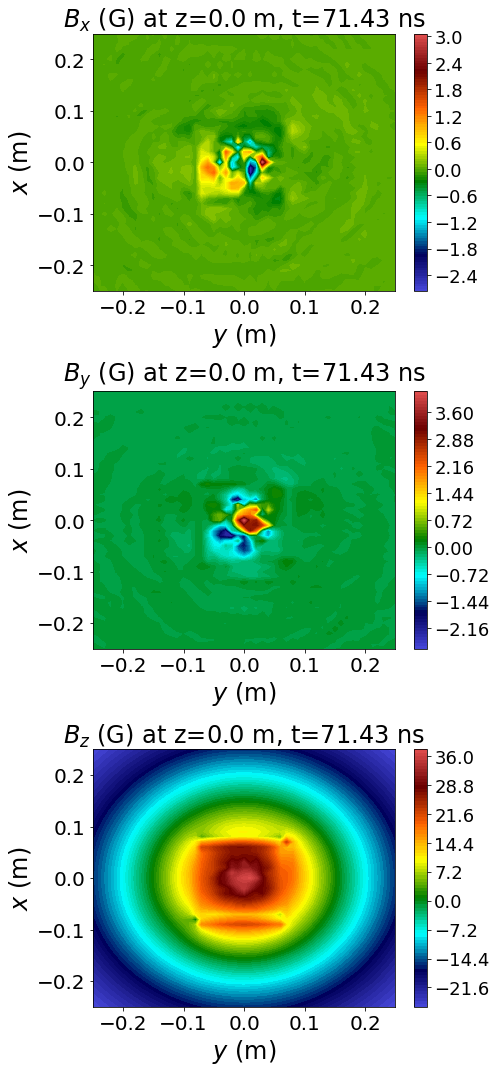

In [7]:
# Field in XY plane ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
title=""#f"Magnetic field in xy midplane at t={time*1e9}ns"
figName="B_xy.png"

Y,X = np.meshgrid(yy,xx,indexing="ij")
BxContourXY = navi.ContourPlot(xdata=Y,ydata=X,zdata=Bx[iz,:,:],
                         ind=1,title=f"$B_x$ (G) at z={zz[iz]:1.1f} m, t={time*1e9:.2f} ns",xlabel="$y$ (m)",ylabel="$x$ (m)",
                         cmap=cmp_hd)
ByContourXY = navi.ContourPlot(xdata=Y,ydata=X,zdata=By[iz,:,:],
                         ind=1,title=f"$B_y$ (G) at z={zz[iz]:1.1f} m, t={time*1e9:.2f} ns",xlabel="$y$ (m)",ylabel="$x$ (m)",
                         cmap=cmp_hd)
BzContourXY = navi.ContourPlot(xdata=Y,ydata=X,zdata=Bz[iz,:,:],
                         ind=1,title=f"$B_z$ (G) at z={zz[iz]:1.1f} m, t={time*1e9:.2f} ns",xlabel="$y$ (m)",ylabel="$x$ (m)",
                         cmap=cmp_hd)

navi.make_subplots(BxContourXY,ByContourXY,BzContourXY,nrows=3,ncols=1,fig_title=title,figsize=(7,15),save_fig=saveFigs,save_name=figName)


## Electric field

Electric fields in simulation midplanes at t=71.431ns


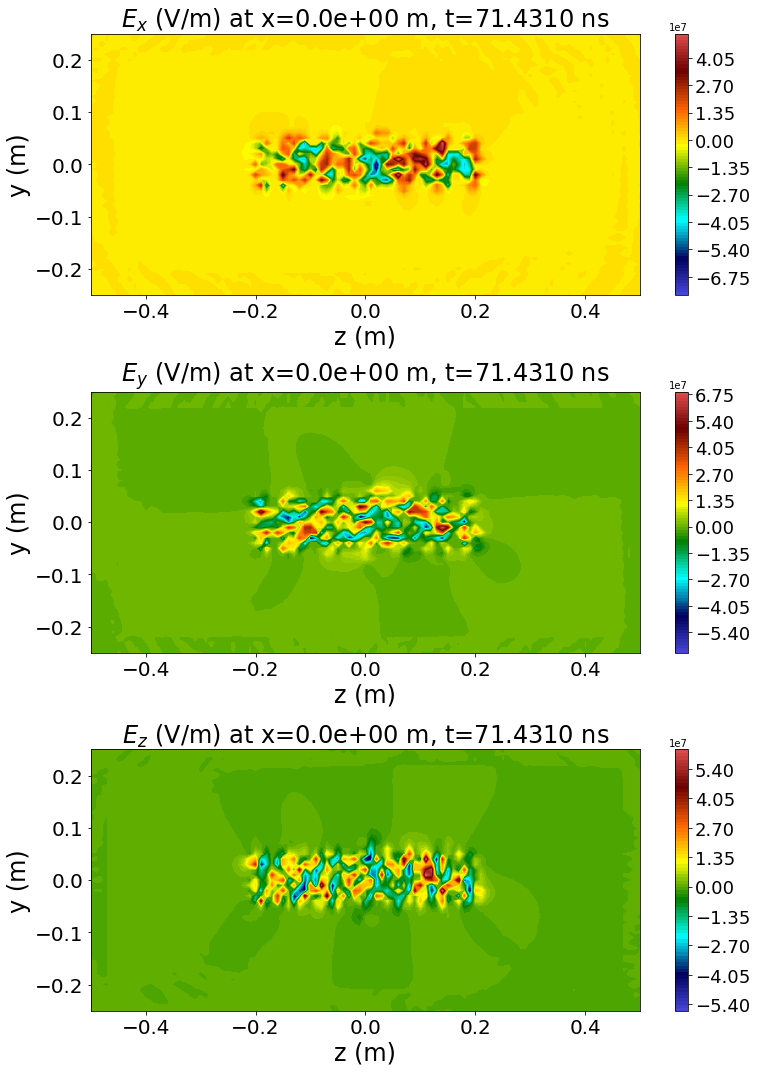

In [8]:
print(f"Electric fields in simulation midplanes at t={time*1e9:.3f}ns")

# Field in ZY plane ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
title=""#f"Electric field in zy midplane at t={time*1e9}ns"
figName="E_zy.png"

Z,Y= np.meshgrid(zz,yy,indexing="ij")
ExContourZY= navi.ContourPlot(xdata=Z,ydata=Y,zdata=Ex[:,:,ix],
                         ind=1,title=f"$E_x$ (V/m) at x={xx[ix]:.1e} m, t={time*1e9:.4f} ns",xlabel="z (m)",ylabel="y (m)",
                         cmap=cmp_hd)
EyContourZY= navi.ContourPlot(xdata=Z,ydata=Y,zdata=Ey[:,:,ix],
                         ind=1,title=f"$E_y$ (V/m) at x={xx[ix]:.1e} m, t={time*1e9:.4f} ns",xlabel="z (m)",ylabel="y (m)",
                         cmap=cmp_hd)
EzContourZY= navi.ContourPlot(xdata=Z,ydata=Y,zdata=Ez[:,:,ix],
                         ind=1,title=f"$E_z$ (V/m) at x={xx[ix]:.1e} m, t={time*1e9:.4f} ns",xlabel="z (m)",ylabel="y (m)",
                         cmap=cmp_hd)

navi.make_subplots(ExContourZY,EyContourZY,EzContourZY,nrows=3,ncols=1,fig_title=title,figsize=(11,15),save_fig=saveFigs,save_name=figName)



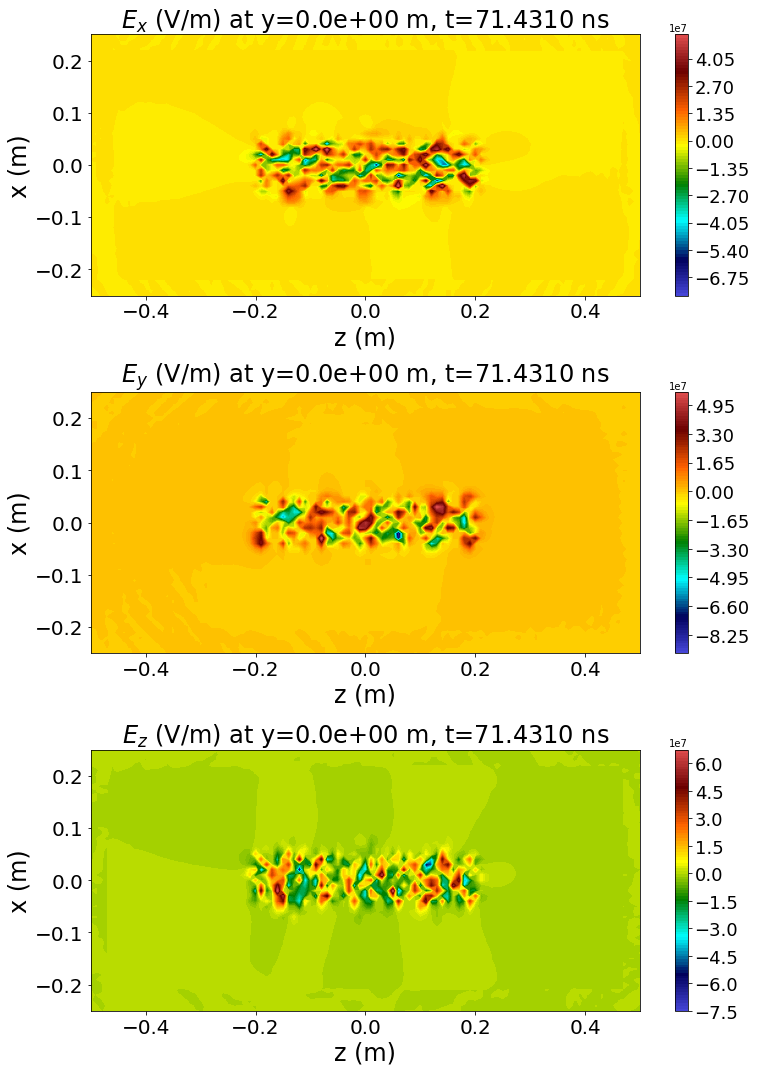

In [9]:
# Field in ZX plane ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
title=""#f"Electric field in zx midplane at t={time*1e9}ns"
figName="E_zx.png"

Z,X= np.meshgrid(zz,xx,indexing="ij")
ExContourZX= navi.ContourPlot(xdata=Z,ydata=X,zdata=Ex[:,iy,:],
                         ind=1,title=f"$E_x$ (V/m) at y={yy[iy]:.1e} m, t={time*1e9:.4f} ns",xlabel="z (m)",ylabel="x (m)",
                         cmap=cmp_hd)
EyContourZX= navi.ContourPlot(xdata=Z,ydata=X,zdata=Ey[:,iy,:],
                         ind=1,title=f"$E_y$ (V/m) at y={yy[iy]:.1e} m, t={time*1e9:.4f} ns",xlabel="z (m)",ylabel="x (m)",
                         cmap=cmp_hd)
EzContourZX= navi.ContourPlot(xdata=Z,ydata=X,zdata=Ez[:,iy,:],
                         ind=1,title=f"$E_z$ (V/m) at y={yy[iy]:.1e} m, t={time*1e9:.4f} ns",xlabel="z (m)",ylabel="x (m)",
                         cmap=cmp_hd)

navi.make_subplots(ExContourZX,EyContourZX,EzContourZX,nrows=3,ncols=1,fig_title=title,figsize=(11,15),save_fig=saveFigs,save_name=figName)


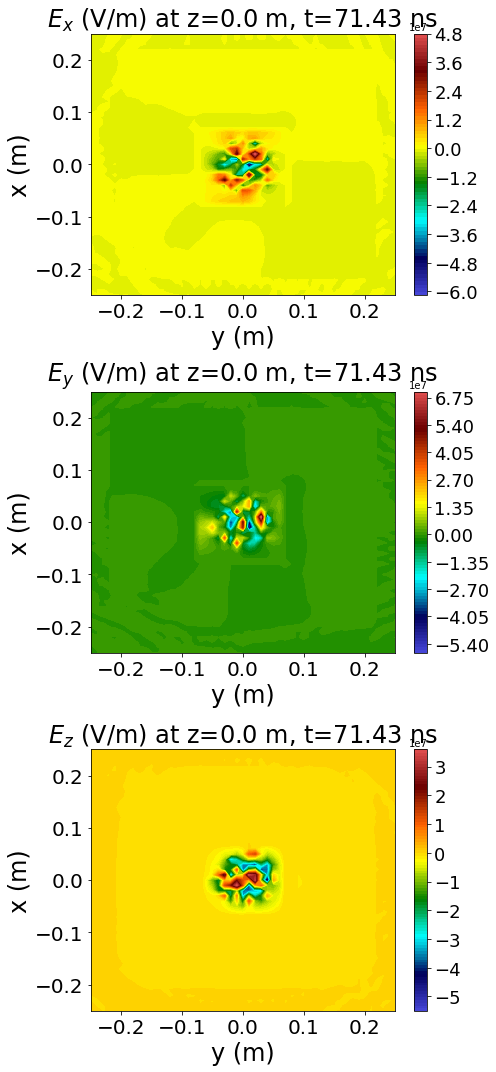

In [10]:
# Field in XY plane ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
title=""#f"Electric field in xy midplane at t={time*1e9}ns"
figName="E_xy.png"


Y,X= np.meshgrid(yy,xx,indexing="ij")
ExContourYX= navi.ContourPlot(xdata=Y,ydata=X,zdata=Ex[iz,:,],
                         ind=1,title=f"$E_x$ (V/m) at z={zz[iz]:1.1f} m, t={time*1e9:.2f} ns",xlabel="y (m)",ylabel="x (m)",
                         cmap=cmp_hd)
EyContourYX= navi.ContourPlot(xdata=Y,ydata=X,zdata=Ey[iz,:,],
                         ind=1,title=f"$E_y$ (V/m) at z={zz[iz]:1.1f} m, t={time*1e9:.2f} ns",xlabel="y (m)",ylabel="x (m)",
                         cmap=cmp_hd)
EzContourYX= navi.ContourPlot(xdata=Y,ydata=X,zdata=Ez[iz,:,],
                         ind=1,title=f"$E_z$ (V/m) at z={zz[iz]:1.1f} m, t={time*1e9:.2f} ns",xlabel="y (m)",ylabel="x (m)",
                         cmap=cmp_hd)

navi.make_subplots(ExContourYX,EyContourYX,EzContourYX,nrows=3,ncols=1,fig_title=title,figsize=(7,15),save_fig=saveFigs,save_name=figName)


## Field on axis

In [11]:
# look at fields along x-axis of machine
ix = nx//2
iy = ny//2

BxAxis = Bx[:,iy,ix]
ByAxis = By[:,iy,ix]
BzAxis = Bz[:,iy,ix]

ExAxis = Ex[:,iy,ix]
EyAxis = Ey[:,iy,ix]
EzAxis = Ez[:,iy,ix]

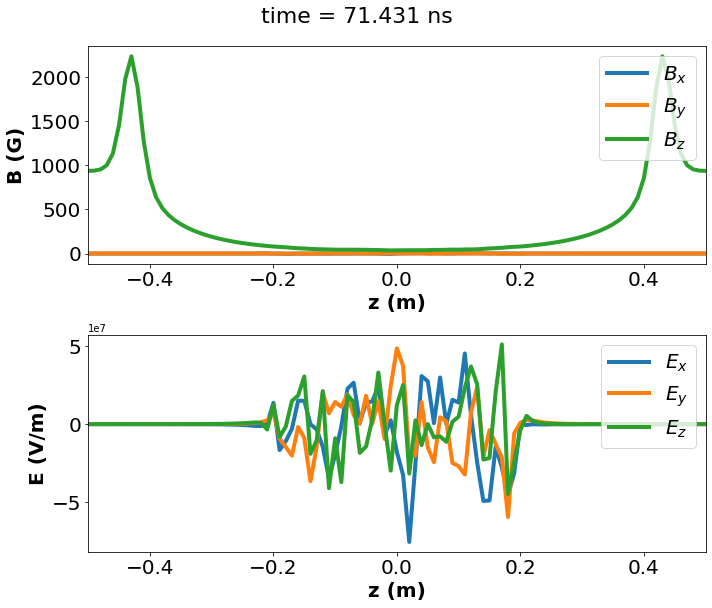

In [12]:
fig,ax = plt.subplots(2,1,figsize=(10,8),tight_layout=True)

fig.suptitle(f"time = {time*1e9:.3f} ns",fontsize=22,y=1.05)

# B ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
ax[0].set_xlabel(r'z (m)',fontsize=20,weight='bold')
ax[0].set_ylabel(r'B (G)',fontsize=20,weight='bold')

ax[0].plot(zz,BxAxis,linewidth=4,label=r'$B_x$')
ax[0].plot(zz,ByAxis,linewidth=4,label=r'$B_y$')
ax[0].plot(zz,BzAxis,linewidth=4,label=r'$B_z$')

# E ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
ax[1].set_xlabel(r'z (m)',fontsize=20,weight='bold')
ax[1].set_ylabel(r'E (V/m)',fontsize=20,weight='bold')

ax[1].plot(zz,ExAxis,linewidth=4,label=r'$E_x$')
ax[1].plot(zz,EyAxis,linewidth=4,label=r'$E_y$')
ax[1].plot(zz,EzAxis,linewidth=4,label=r'$E_z$')

#ax[1].ticklabel_format(style='sci', axis='y', scilimits=(0,0))

[axis.tick_params(labelsize=20) for axis in ax]
[axis.legend(fontsize=20,loc=1) for axis in ax]
[axis.set_xlim([zz[0],zz[-1]]) for axis in ax]

plt.show()

In [13]:
########  Definitions for FC (flux-conserving) rings #########

fc_R = np.zeros((2,6))  # (1, :) are the rmin, (2, :) are the rmax
fc_Z = np.zeros((2,6))  # (1, :) are the zmin, (2, :) are the zmax

fc_R[0,0] = 0.041275;
fc_R[1,0] = 0.050800;
fc_Z[0,0] = -0.03425;
fc_Z[1,0] = -0.02925;

fc_R[0,1] = 0.041275;
fc_R[1,1] = 0.050800;
fc_Z[0,1] = 0.02925;
fc_Z[1,1] = 0.03425;

fc_R[0,2] = 0.036830;
fc_R[1,2] = 0.050800;
fc_Z[0,2] = 0.092750;
fc_Z[1,2] = 0.097750;

fc_R[0, 3] = 0.036830;
fc_R[1, 3] = 0.050800;
fc_Z[0, 3] = -0.09775;
fc_Z[1, 3] = -0.09275;

fc_R[0, 4] = 0.027300;
fc_R[1, 4] = 0.050800;
fc_Z[0, 4] = 0.162600;
fc_Z[1, 4] = 0.167600;

fc_R[0, 5] = 0.027300;
fc_R[1, 5] = 0.050800;
fc_Z[0, 5] = -0.16760;
fc_Z[1, 5] = -0.16260;

dz= 0.005

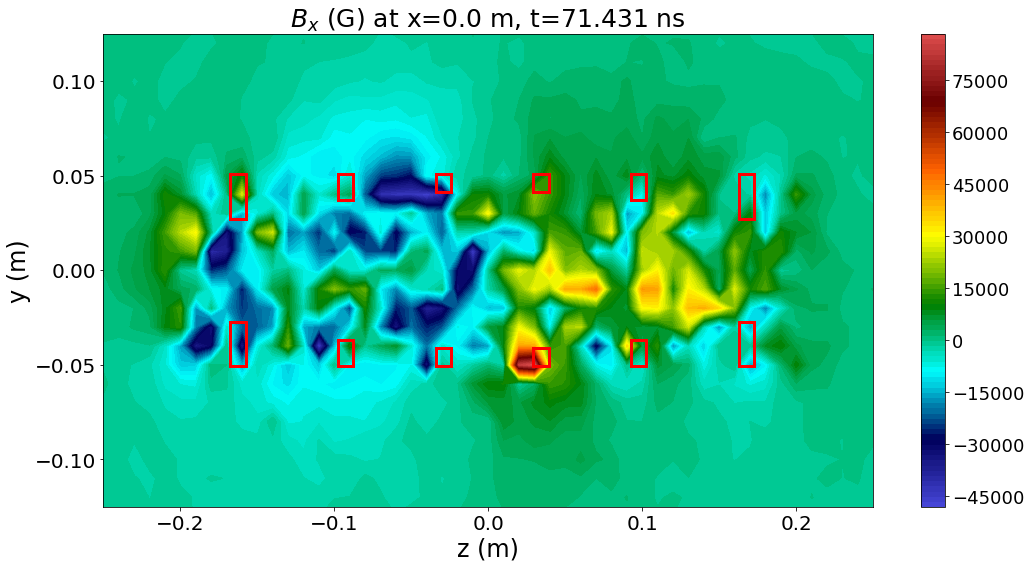

In [30]:
import matplotlib.patches as patches

Z,X= np.meshgrid(zz,xx,indexing="ij")
Y=X

fig = plt.figure(figsize=(15,8),tight_layout=True)
ax = fig.add_subplot()


#title=f"$E_x$ (V/m) at y={yy[iy]:1.1f} m, t={time*1e9:.2f} ns"
#title=f"$B_y$ (G) at y={yy[iy]:1.1f} m, t={time*1e9:.2f} ns"
title=f"$B_x$ (G) at x={xx[ix]:1.1f} m, t={time*1e9} ns"
#title=f"$B_x$ (G) at x={xx[ix]:1.1f} m"


# set subplot params
#ax.set_title("Antenna and Rings", fontsize=24)
#ax.set_title(,fontsize=25)
ax.set_title(title,fontsize=25)
ax.set_xlabel("z (m)", fontsize=24)
ax.set_ylabel("y (m)", fontsize=24)
ax.tick_params(labelsize=20)

#im = ax.contourf(Z, X, Ex[:,iy,:], cmap=cmp_hd, levels=100)
#im = ax.contourf(Z, X, Ez[:,iy,:], cmap=cmp_hd, levels=100)
#im = ax.contourf(Z, X, By[:,iy,:], cmap=cmp_hd, levels=100)
im = ax.contourf(Z, Y, Bx[:,:,ix], cmap=cmp_hd, levels=100)



cb = fig.colorbar(im, ax=ax)
cb.ax.tick_params(labelsize=18)


# Rectangle top patches
rect1 = patches.Rectangle((fc_Z[0,0], fc_R[0,0]), dz, fc_R[1,0]-fc_R[0,0], linewidth=3, edgecolor='r', facecolor='none')
rect2 = patches.Rectangle((fc_Z[0,1], fc_R[0,1]), dz, fc_R[1,1]-fc_R[0,1], linewidth=3, edgecolor='r', facecolor='none')
rect3 = patches.Rectangle((fc_Z[0,2], fc_R[0,2]), dz, fc_R[1,2]-fc_R[0,2], linewidth=3, edgecolor='r', facecolor='none')
rect4 = patches.Rectangle((fc_Z[0,3], fc_R[0,3]), dz, fc_R[1,3]-fc_R[0,3], linewidth=3, edgecolor='r', facecolor='none')
rect5 = patches.Rectangle((fc_Z[0,4], fc_R[0,4]), dz, fc_R[1,4]-fc_R[0,4], linewidth=3, edgecolor='r', facecolor='none')
rect6 = patches.Rectangle((fc_Z[0,5], fc_R[0,5]), dz, fc_R[1,5]-fc_R[0,5], linewidth=3, edgecolor='r', facecolor='none')
ax.add_patch(rect1)
ax.add_patch(rect2)
ax.add_patch(rect3)
ax.add_patch(rect4)
ax.add_patch(rect5)
ax.add_patch(rect6)

# bottom rectangles
rect7 = patches.Rectangle((fc_Z[0,0], -fc_R[0,0]), dz, -fc_R[1,0]+fc_R[0,0], linewidth=3, edgecolor='r', facecolor='none')
rect8 = patches.Rectangle((fc_Z[0,1], -fc_R[0,1]), dz, -fc_R[1,1]+fc_R[0,1], linewidth=3, edgecolor='r', facecolor='none')
rect9 = patches.Rectangle((fc_Z[0,2], -fc_R[0,2]), dz, -fc_R[1,2]+fc_R[0,2], linewidth=3, edgecolor='r', facecolor='none')
rect10= patches.Rectangle((fc_Z[0,3], -fc_R[0,3]), dz, -fc_R[1,3]+fc_R[0,3], linewidth=3, edgecolor='r', facecolor='none')
rect11= patches.Rectangle((fc_Z[0,4], -fc_R[0,4]), dz, -fc_R[1,4]+fc_R[0,4], linewidth=3, edgecolor='r', facecolor='none')
rect12= patches.Rectangle((fc_Z[0,5], -fc_R[0,5]), dz, -fc_R[1,5]+fc_R[0,5], linewidth=3, edgecolor='r', facecolor='none')
ax.add_patch(rect7)
ax.add_patch(rect8)
ax.add_patch(rect9)
ax.add_patch(rect10)
ax.add_patch(rect11)
ax.add_patch(rect12)


ax.set_xlim([-0.25,0.25])
ax.set_ylim([-0.125,0.125])


plt.show()

# Particles

In [15]:
# load particle data
path = '/Users/mlavell/TriForce/tflink/data/pFRC_p.hdf5'
pdata = HDF5Reader(path)

Loading HDF5 Particle files.


In [16]:
nParticles= pdata.nParticles
spid      = pdata.frames[0].spid

ie=[] # electron indices
iH=[] # Hydrogen

for ip in range(nParticles):
    if   spid[ip] == -1: ie.append(ip)
    elif spid[ip] == 0:  iH.append(ip)

Ne = np.size(ie)
Ni = np.size(iH)
        
nsteps= pdata.nFrames
time= np.zeros(nsteps)

nParticleTrajectories= 10#Ne # number of particle trajectories

trajectories = np.zeros((nsteps,nParticleTrajectories,3))

for i in range(nsteps):
    time[i] = pdata.frames[i].time
    for j in range(nParticleTrajectories):
        trajectories[i,j,:] = pdata.frames[i].location[ie[j]] + fdata.origin
        #trajectories[i,j,:] = pdata.frames[i].location[iH[j]] + fdata.origin

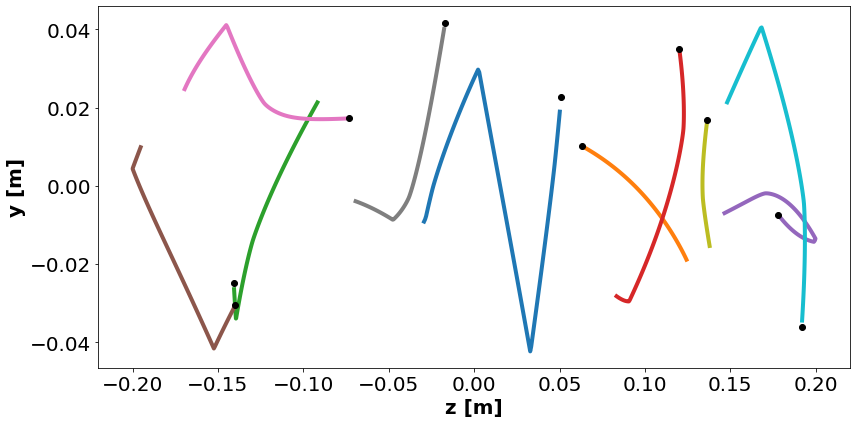

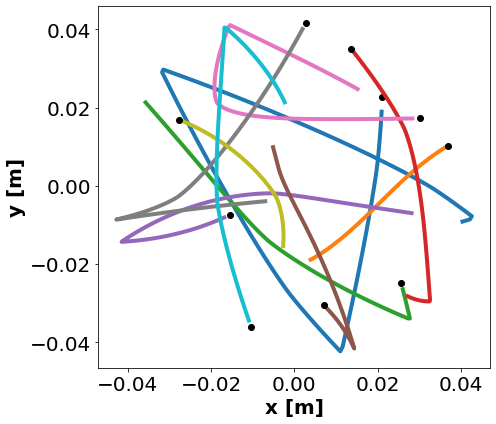

In [17]:
# plot in yz plane
fig1,ax1 = plt.subplots(1,1,figsize=(12,6),tight_layout=True)
ax1.set_xlabel(r'z [m]',fontsize=20,weight='bold')
ax1.set_ylabel(r'y [m]',fontsize=20,weight='bold')
for itraj in range(nParticleTrajectories):
    ax1.plot(trajectories[:-2,itraj,2],trajectories[:-2,itraj,1],linewidth=4,label=r'pos(z,y)')
    ax1.plot(trajectories[-1,itraj,2],trajectories[-1,itraj,1],'ok',linewidth=4,label=r'pos(z,y)')
ax1.tick_params(labelsize=20)
#ax1.set_xlim([zz[0],zz[-1]])
#ax1.set_ylim([yy[0],yy[-1]])

# plot in xy plane
fig2,ax2 = plt.subplots(1,1,figsize=(7,6),tight_layout=True)
ax2.set_xlabel(r'x [m]',fontsize=20,weight='bold')
ax2.set_ylabel(r'y [m]',fontsize=20,weight='bold')
for itraj in range(nParticleTrajectories):
    ax2.plot(trajectories[:-2,itraj,0],trajectories[:-2,itraj,1],linewidth=4,label=r'pos(x,y)')
    ax2.plot(trajectories[-1,itraj,0],trajectories[-1,itraj,1],'ok',linewidth=4,label=r'pos(x,y)')
ax2.tick_params(labelsize=20)
#ax2.set_xlim([xx[0],xx[-1]])
#ax2.set_ylim([yy[0],yy[-1]])

plt.show()

## Temperature evolution

In [18]:
# constants (mks)
Mi= 1.67262192e-27
Me= 9.10938356e-31
qe= 1.60217663e-19
MH=1  # atomic number hydrogen
MC=6  # carbon
MO=16 # oxygen 
Kb= 1.38064852e-23
eps0= 8.8541878128e-12
tol = 1e-27

# function returns temperature and velocity drift
def getTempDrift(velx,mass):
    nparts = np.shape(velx)[0]
    sumV2 = 0; sumVDrift = np.zeros(3)
    for p in range(nparts):
        sumV2     += np.sum(velx[p]**2)
        sumVDrift += velx[p]
    temp   = mass/(3*Kb) * abs(sumV2/nparts-np.sum((sumVDrift/nparts)**2))
    vdrift = sumVDrift/nparts
    return temp,vdrift

# function returns Debye length for single species
def getDebyeLength(ndens,atomNum,temp):
    rmin = (4.0*np.pi*ndens/3.0)**(-1/3) # min mean interatomic distance
    debyelength = (ndens*(qe*atomNum)**2/(eps0*Kb*temp))**(-0.5)
    return max(rmin,debyelength)

# function returns Debye length for two species
def getDebyeLengthTwoSpecies(ndens1,atomNum1,temp1,ndens2,atomNum2,temp2):
    # min mean interatomic distance
    rmin = (4.0*np.pi*max(ndens1,ndens2)/3.0)**(-1/3)
    ldm2   = (ndens1*(qe*atomNum1)**2/(eps0*Kb*temp1) + ndens2*(qe*atomNum2)**2/(eps0*Kb*temp2))
    return max(rmin,ldm2**(-0.5))

# function returns plasma frequency
def getPlasmaFrequency(ndens,chrg,mass):
    return (ndens*(qe*chrg)**2/(eps0*mass))**0.5

# function returns array of velocity norms
def getVelocityNorm(vec3,nsteps):
    vnorm = np.zeros(nsteps)
    for s in range(nsteps):
        vnorm[s]= np.linalg.norm(vec3[s,:])
    return vnorm

# function returns thermal velocity
def getThermalVelocity(temperature,mass):
    return np.sqrt(Kb*temperature/mass)

In [19]:
Te = np.zeros(nsteps)
TH = np.zeros(nsteps)
tns = np.zeros(nsteps)

ve = np.zeros((nsteps,3))
vH = np.zeros((nsteps,3))

for istep in range(nsteps):
    tns[istep]= pdata.frames[istep].time*1e9
    Te[istep],ve[istep,:]= getTempDrift(pdata.frames[istep].velocity[ie],pdata.frames[istep].mass[ie[0]])
    TH[istep],vH[istep,:]= getTempDrift(pdata.frames[istep].velocity[iH],pdata.frames[istep].mass[iH[0]])
    
# read number density from output; we should read in parms file..
ndens=1e26
lambdaDebye= getDebyeLength(ndens,1,Te[0]) 

# velocity magnitude
vemag = getVelocityNorm(ve,nsteps)
vHmag = getVelocityNorm(vH,nsteps)

# thermal velocity
vthe= getThermalVelocity(Te[0],Me)
vthH= getThermalVelocity(TH[0],Mi)

print("Finished analysis.")

Finished analysis.


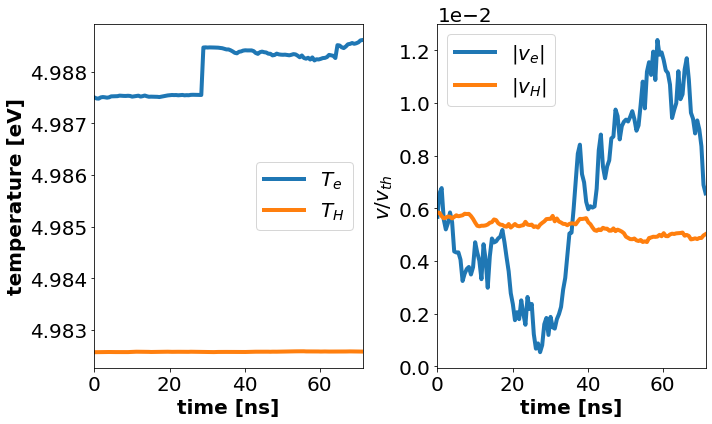

In [20]:
fig, ax = plt.subplots(1,2,figsize=(10,6),tight_layout=True)
#fig.suptitle(r"$nsteps=1e4$, $\lambda_D =$ %5.2e m, $\Delta x =$ %5.2e m"%(lambdaDebye,DX),fontsize=22,y=1.05)

# plot temperature ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
ax[0].set_xlabel(r'time [ns]',fontsize=20,weight='bold')
ax[0].set_ylabel(r'temperature [eV]',fontsize=20,weight='bold')

# plot histograms for ions
ax[0].plot(tns,Te/11601.,linewidth=4,label=r'$T_e$')
ax[0].plot(tns,TH/11601.,linewidth=4,label=r'$T_H$')

ax[0].set_xlim([tns[0],tns[-1]])
#ax[0].set_ylim([4,6])
ax[0].tick_params(labelsize=20)
ax[0].legend(fontsize=20)


# plot vx drift ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
ax[1].set_xlabel(r'time [ns]',fontsize=20,weight='bold')
ax[1].set_ylabel(r'$v/v_{th}$',fontsize=20,weight='bold') #[m/s]

# velocity magnitude
ax[1].plot(tns,vemag/vthe,linewidth=4,label=r'$|v_e|$')
ax[1].plot(tns,vHmag/vthH,linewidth=4,label=r'$|v_H|$')

ax[1].set_xlim([tns[0],tns[-1]])
ax[1].tick_params(labelsize=20)
ax[1].ticklabel_format(style='sci', axis='y', scilimits=(0,0))
ax[1].yaxis.offsetText.set_fontsize(20)
ax[1].legend(fontsize=20)

plt.show()